<a href="https://colab.research.google.com/github/mimomaina/pythondataanalysis/blob/main/Apple_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
Apple = pd.read_csv('/content/appl_1980_2014.csv')

### Step 3. Assign it to a variable apple

In [4]:
apple = Apple


### Step 4.  Check out the type of the columns

In [5]:
print(apple.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])


### Step 6.  Set the date as the index

In [7]:
apple.set_index('Date', inplace=True)


### Step 7.  Is there any duplicate dates?

In [8]:
duplicates = apple.index.duplicated().sum()
print(f'Number of duplicate dates: {duplicates}')


Number of duplicate dates: 0


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [11]:
apple = apple.sort_index()
apple


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [12]:
last_business_day_of_month = apple.resample('M').last()
print(last_business_day_of_month.head())


             Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-31  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-28  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44


<ipython-input-12-6798eda0b436>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_business_day_of_month = apple.resample('M').last()


### Step 10.  What is the difference in days between the first day and the oldest

In [13]:
first_day = apple.index[0]
oldest_day = apple.index[-1]
date_diff = (first_day - oldest_day).days
print(f'Difference in days: {date_diff} days')


Difference in days: -12261 days


### Step 11.  How many months in the data we have?

In [14]:
months_count = apple.resample('M').size()
print(f'Number of months in the data: {months_count.count()}')


Number of months in the data: 404


<ipython-input-14-5eaeff82d73d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months_count = apple.resample('M').size()


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

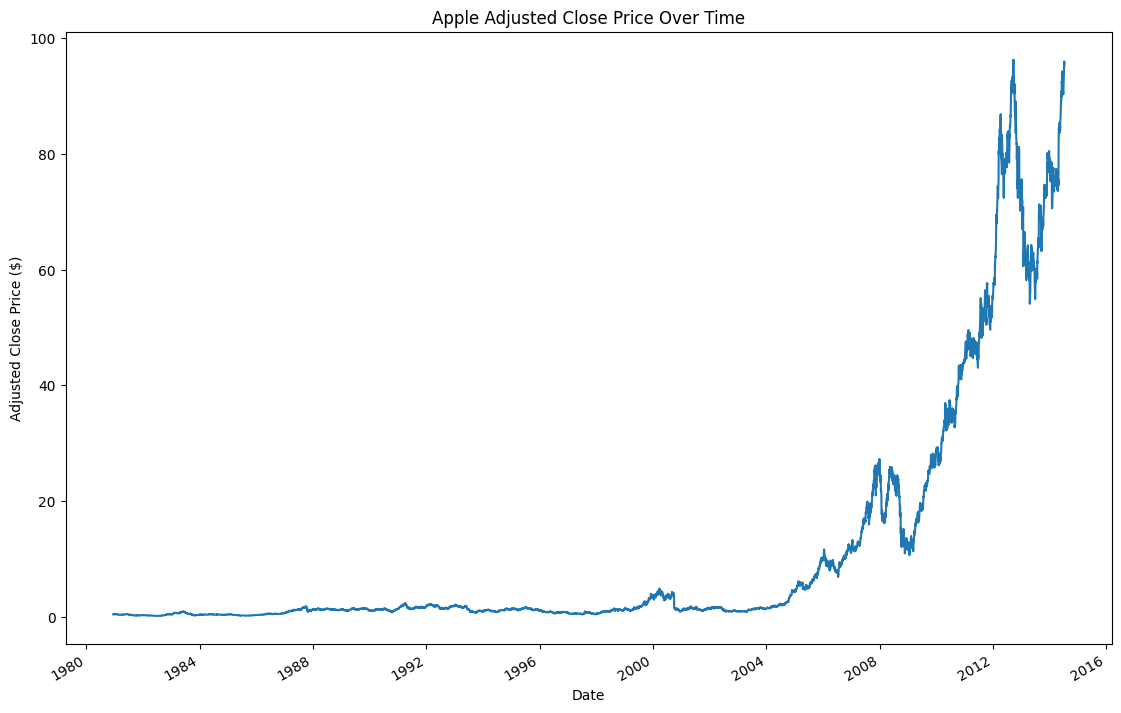

In [17]:
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title('Apple Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.show()


### BONUS: Create your own question and answer it.

 What is the highest closing price during the period?

In [18]:
highest_close = apple['Close'].max()
print(f'The highest closing price during the period is: ${highest_close:.2f}')


The highest closing price during the period is: $702.10
